In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

In [4]:
df=pd.read_csv(r'C:\Users\anegi\Downloads\archive (9)/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
dict_={}
for feature in df.columns:
    dict_[feature]=df[feature].isnull().sum()
pd.DataFrame(dict_,index=['null_values']).transpose()

,null_values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [7]:
df.drop(['company','agent'],axis=1,inplace=True)

In [8]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [12]:
dict_={}
for feature in df.columns:
    dict_[feature]=df[feature].value_counts().shape[0]
pd.DataFrame(dict_,index=['unique_counts']).transpose()

,unique_counts
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,15
stays_in_week_nights,33
adults,14


In [13]:
df.country.value_counts()

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

<AxesSubplot:>

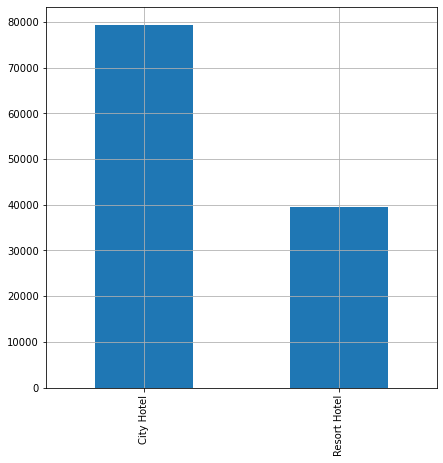

In [15]:
df['hotel'].value_counts().plot(kind='bar',figsize=(7,7),grid=True)

<AxesSubplot:>

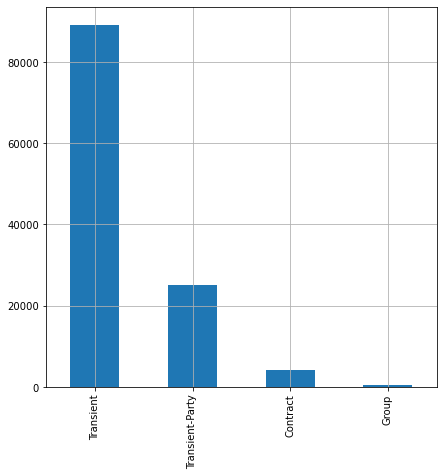

In [16]:
df['customer_type'].value_counts().plot(kind='bar',figsize=(7,7),grid=True)

In [17]:
df.arrival_date_month.value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

<AxesSubplot:>

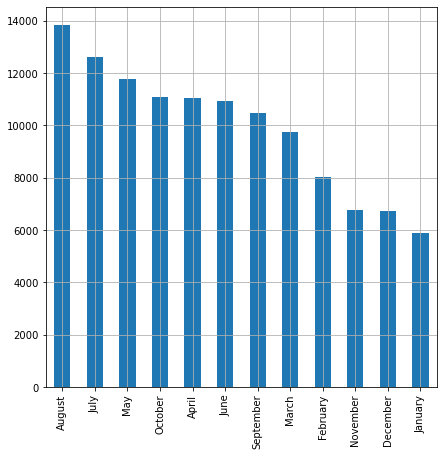

In [18]:
df['arrival_date_month'].value_counts().plot(kind='bar',figsize=(7,7),grid=True)

In [19]:
df.adr.value_counts()

62.00     3753
75.00     2710
90.00     2471
65.00     2397
0.00      1938
          ... 
96.09        1
48.03        1
89.43        1
63.07        1
157.71       1
Name: adr, Length: 8870, dtype: int64

In [20]:
df.adr.mean()

102.00324252720587

In [25]:
x=df.groupby('hotel')['is_canceled'].value_counts()

In [26]:
x

hotel         is_canceled
City Hotel    0              46226
              1              33076
Resort Hotel  0              28519
              1              11077
Name: is_canceled, dtype: int64

In [27]:
print('percentage of cancellation of city hotel:',x[1]*100/(x[0]+x[1]))
print('percentage of cancellation of resort hotel :',x[3]*100/(x[2]+x[3]))

percentage of cancellation of city hotel: 41.70891024186023
percentage of cancellation of resort hotel : 27.975047984644913


<AxesSubplot:xlabel='days_in_waiting_list', ylabel='Density'>

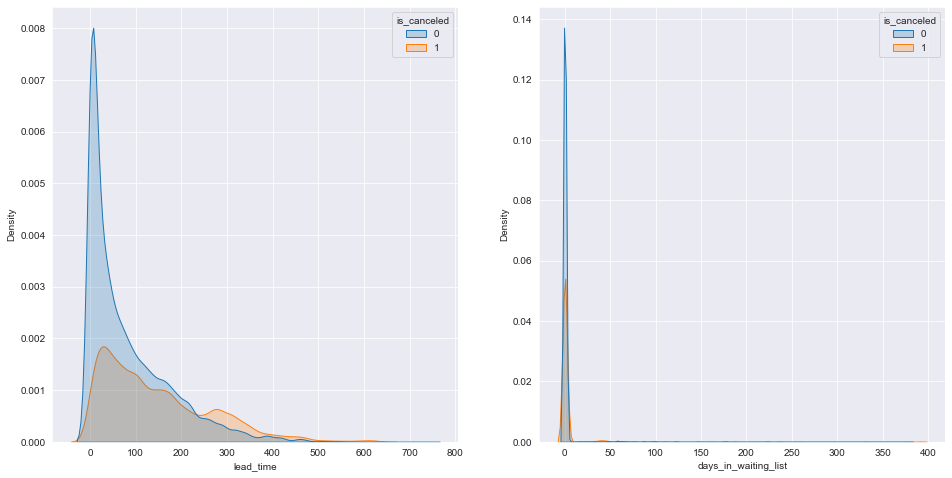

In [33]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(16,8))
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.kdeplot(x='lead_time',data=df,hue='is_canceled',fill=True,ax=ax[0])
sns.kdeplot(x='days_in_waiting_list',data=df,hue='is_canceled',fill=True,ax=ax[1])

In [35]:
df.reserved_room_type.value_counts()

A    85601
D    19173
E     6497
F     2890
G     2083
B     1114
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

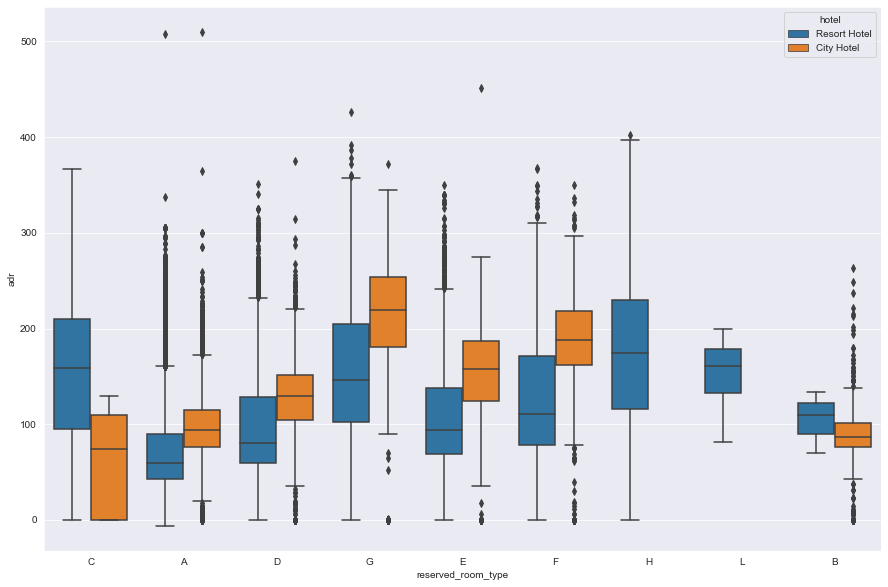

In [34]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(x='reserved_room_type',y='adr',data=df[df['is_canceled']==0],hue='hotel')

In [36]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel=city_hotel[city_hotel['is_canceled']==0]
bookings_city_hotel_month=city_hotel.groupby('arrival_date_month',as_index=False)['hotel'].count()
bookings_city_hotel_month.rename(columns={'hotel':'city_hotel'},inplace=True)

In [37]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel=resort_hotel[resort_hotel['is_canceled']==0]
bookings_resort_hotel_month=resort_hotel.groupby('arrival_date_month',as_index=False)['hotel'].count()
bookings_resort_hotel_month.rename(columns={'hotel':'resort_hotel'},inplace=True)

Text(0, 0.5, 'No. of Guests')

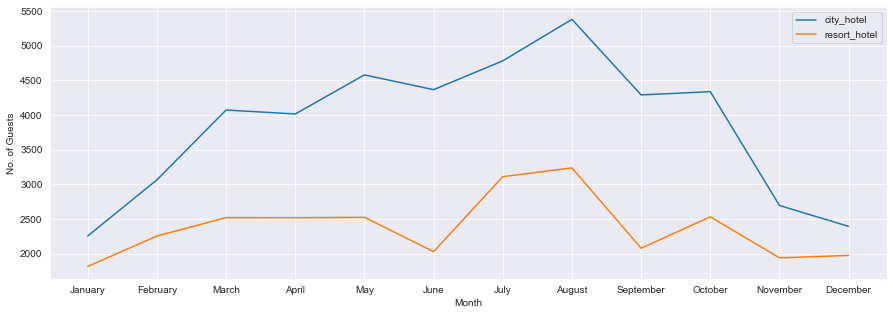

In [41]:
total_bookings=bookings_city_hotel_month.merge(bookings_resort_hotel_month,on='arrival_date_month')
total_bookings.rename(columns={'arrival_date_month':'month'},inplace=True)

#since month data is not in sorted order we need to sort it in the order jan,feb,march....
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
total_bookings=total_bookings.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

#plotting
fig,axes=plt.subplots(figsize=(15,5))
plt.plot('month','city_hotel',data=total_bookings,label='city_hotel')
plt.plot('month','resort_hotel',data=total_bookings,label='resort_hotel')
plt.legend()
plt.xlabel('Month')
plt.ylabel('No. of Guests')

In [42]:
df.corr()['is_canceled'].abs().sort_values()

stays_in_weekend_nights           0.002631
children                          0.004751
arrival_date_day_of_month         0.006127
arrival_date_week_number          0.007465
arrival_date_year                 0.016412
stays_in_week_nights              0.024110
babies                            0.032521
adr                               0.046199
days_in_waiting_list              0.054016
previous_bookings_not_canceled    0.055493
adults                            0.058381
is_repeated_guest                 0.085179
previous_cancellations            0.109922
booking_changes                   0.144659
required_car_parking_spaces       0.194796
total_of_special_requests         0.235643
lead_time                         0.291994
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [43]:
df.drop(['arrival_date_week_number','arrival_date_day_of_month','reservation_status','arrival_date_year','assigned_room_type','booking_changes'],axis=1,inplace=True)

In [44]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='object']
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='object']

In [47]:
df.reservation_status_date

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 118898, dtype: object

In [48]:
df_cat=df[categorical_feature]
df_num=df[continuous_feature]

In [49]:
df_cat['year']=df_cat['reservation_status_date'].str.split('-',expand=True)[0].astype(str).astype(int)
df_cat['month']=df_cat['reservation_status_date'].str.split('-',expand=True)[1].astype(str).astype(int)

In [52]:
df_cat.month.value_counts()

7     12074
8     11223
10    11095
1     10622
5     10294
3     10177
4      9957
2      9436
9      9359
6      9255
11     8052
12     7354
Name: month, dtype: int64

In [53]:
df_cat.drop('reservation_status_date',axis=1,inplace=True)

In [54]:
encoder=LabelEncoder()
dict_cat={}
for feature in df_cat.columns:
    dict_cat[feature]=encoder.fit_transform(df_cat[feature])
df_cat=pd.DataFrame(dict_cat)

In [55]:
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month
0,1,5,0,135,3,1,2,0,2,1,6
1,1,5,0,135,3,1,2,0,2,1,6
2,1,5,0,59,3,1,0,0,2,1,6
3,1,5,0,59,2,0,0,0,2,1,6
4,1,5,0,59,6,3,0,0,2,1,6


In [56]:
df_num.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0.0,0,0,0,0,0,0.0,0,0
1,0,737,0,0,2,0.0,0,0,0,0,0,0.0,0,0
2,0,7,0,1,1,0.0,0,0,0,0,0,75.0,0,0
3,0,13,0,1,1,0.0,0,0,0,0,0,75.0,0,0
4,0,14,0,2,2,0.0,0,0,0,0,0,98.0,0,1


In [57]:
df_num.drop('is_canceled',axis=1,inplace=True)

In [58]:
scaler=MinMaxScaler()
df_num=pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)

In [67]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,...,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month
0,0.464043,0.0,0.00000,0.036364,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,135,3,1,2,0,2,1,6
1,1.000000,0.0,0.00000,0.036364,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,135,3,1,2,0,2,1,6
2,0.009498,0.0,0.02439,0.018182,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,59,3,1,0,0,2,1,6
3,0.017639,0.0,0.02439,0.018182,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,59,2,0,0,0,2,1,6
4,0.018996,0.0,0.04878,0.036364,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,59,6,3,0,0,2,1,6


In [60]:
y=df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.30)

In [61]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.7585365853658537
f1_score:0.5873221216041398
precision:0.8043307086614173
recall:0.4625311297260584


In [62]:
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.7529296327446033
f1_score:0.5065785790269302
precision:0.9813449023861172
recall:0.34140819560787866


In [63]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.8989627137650686
f1_score:0.8534601935431406
precision:0.9252402362690646
recall:0.7920156969285337


In [64]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.8989627137650686
f1_score:0.8534601935431406
precision:0.9252402362690646
recall:0.7920156969285337


In [65]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.9335576114381834
f1_score:0.9062722455113502
precision:0.9520565018695472
recall:0.8646894573994416


In [66]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

[22:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score:0.9385477992710961
f1_score:0.9117196939186468
precision:0.9775455566111063
recall:0.8541996830427893
